# Model for content based filtering
This notebook process data to create a ml model.

## Preprocessing data to ML Model

### Loading data from csv

In [20]:
import pandas as pd

# Load movies genre dataset
df1 = pd.read_csv("export_files\dataset_movies.csv")
df1.set_index("id",inplace=True)

# Load collection column dataset
df2 = pd.read_csv("export_files\dataset_collections.csv")
df2.set_index("id", inplace=True)

# Load keywords dataset
df3 = pd.read_csv("export_files\dataset_keywords.csv")
df3.set_index("id", inplace=True)

# Merge dataframes using left join
df = df1.merge(df2, how="left", left_index=True, right_index=True)
df = df.merge(df3, how="left", left_index=True, right_index=True)
df

,budget,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,...,avant-garde,school,robbery,dutch cabaret,"london, england",1970s,sibling relationship,surrealism,anthology,france
id,,,,,,,,,,,,,,,,,,,,,
2,0,Ariel,8.165,10/21/1988,0,73,6.8,157,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Varjoja paratiisissa,8.509,10/17/1986,0,74,7.2,158,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4000000,Four Rooms,14.441,12/9/1995,4257354,98,5.7,2127,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,21000000,Judgment Night,13.336,10/15/1993,12136938,110,6.5,230,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,42000,Life in Loops (A Megacities RMX),2.352,1/1/2006,0,80,7.5,18,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285854,0,Reunited,0.600,1/26/2010,0,90,4.3,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285855,0,Der Schrecken der Garnison,0.877,4/23/1931,0,86,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285856,0,Big Muddy,2.304,9/4/2014,0,104,4.9,6,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop Dates before 1900
We drop movies before 1900.

In [21]:
import re

def find_1800(date):
    """This function find for "yyyy-mm-dd" or "yyyy-dd-mm" format date.\n
    Return a bool series list where true if are occurence."""
    return bool(re.findall(r"18[0-9]{2}-[0-9]{2}-[0-9]{2}",date))

print("Rows to drop.")
print(df["release_date"][df["release_date"].apply(find_1800)])

Rows to drop.
id
160       1896-01-25
774       1895-03-22
16463     1888-10-14
16464     1888-10-15
16612     1894-03-14
             ...    
283448    1898-11-26
283969    1895-01-02
284553    1898-01-02
285521    1899-01-02
285674    1898-01-02
Name: release_date, Length: 789, dtype: object


In [22]:
drop_index = df["release_date"][df["release_date"].apply(find_1800)].index
df.drop(drop_index, inplace=True)

print("Rows in 'yyyy-mm-dd' format after drop")
print(df["release_date"][df["release_date"].apply(find_1800)])

Rows in 'yyyy-mm-dd' format after drop
Series([], Name: release_date, dtype: object)


### Extracting title and release date column
We will use this dataframe to extract name by id.

In [23]:
titles = df[["original_title","release_date"]]
titles

,original_title,release_date
id,,
2,Ariel,10/21/1988
3,Varjoja paratiisissa,10/17/1986
5,Four Rooms,12/9/1995
6,Judgment Night,10/15/1993
8,Life in Loops (A Megacities RMX),1/1/2006
...,...,...
285854,Reunited,1/26/2010
285855,Der Schrecken der Garnison,4/23/1931
285856,Big Muddy,9/4/2014


### Eliminate title column from dataframe

In [24]:
df.drop("original_title",axis=1,inplace=True)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,avant-garde,school,robbery,dutch cabaret,"london, england",1970s,sibling relationship,surrealism,anthology,france
id,,,,,,,,,,,,,,,,,,,,,
2,0,8.165,10/21/1988,0,73,6.8,157,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,8.509,10/17/1986,0,74,7.2,158,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4000000,14.441,12/9/1995,4257354,98,5.7,2127,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,21000000,13.336,10/15/1993,12136938,110,6.5,230,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,42000,2.352,1/1/2006,0,80,7.5,18,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285854,0,0.600,1/26/2010,0,90,4.3,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285855,0,0.877,4/23/1931,0,86,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285856,0,2.304,9/4/2014,0,104,4.9,6,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Transform date to ordinal

In [25]:
from datetime import datetime

def date_to_ordinal(date):
    """Transform date in format %Y/%m/%d to ordinal date type."""
    if date != "0":
        return datetime.strptime(date, "%m/%d/%Y").toordinal()
    else:
        return 0

#apply method apply function in all element column(s)
#transform method is similar to apply
df["release_date"] = df["release_date"].apply(date_to_ordinal)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,avant-garde,school,robbery,dutch cabaret,"london, england",1970s,sibling relationship,surrealism,anthology,france
id,,,,,,,,,,,,,,,,,,,,,
2,0,8.165,726031,0,73,6.8,157,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,8.509,725296,0,74,7.2,158,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4000000,14.441,728636,4257354,98,5.7,2127,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,21000000,13.336,727851,12136938,110,6.5,230,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,42000,2.352,732312,0,80,7.5,18,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285854,0,0.600,733798,0,90,4.3,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285855,0,0.877,705030,0,86,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285856,0,2.304,735480,0,104,4.9,6,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Replacing 0 values to NaN values
In order to use NaN Euclidean Distance, a modified version of euclidean distance, we transform 0 values to np.nan values format using numpy library.

In [26]:
import numpy as np
df.iloc[:,0:7] = df.iloc[:,0:7].replace(0,np.nan)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,avant-garde,school,robbery,dutch cabaret,"london, england",1970s,sibling relationship,surrealism,anthology,france
id,,,,,,,,,,,,,,,,,,,,,
2,NaN,8.165,726031.0,NaN,73.0,6.8,157.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,8.509,725296.0,NaN,74.0,7.2,158.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4000000.0,14.441,728636.0,4257354.0,98.0,5.7,2127.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,21000000.0,13.336,727851.0,12136938.0,110.0,6.5,230.0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,42000.0,2.352,732312.0,NaN,80.0,7.5,18.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285854,NaN,0.600,733798.0,NaN,90.0,4.3,2.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285855,NaN,0.877,705030.0,NaN,86.0,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285856,NaN,2.304,735480.0,NaN,104.0,4.9,6.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory analysis

### Describe table

In [27]:
df.iloc[:,0:7].describe()

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count
count,1.445100e+04,174399.000000,170588.000000,1.049600e+04,150376.000000,133772.000000,133815.000000
mean,1.419497e+07,3.074824,725864.097510,5.084016e+07,85.017888,5.779298,101.655315
std,2.901667e+07,8.144654,9568.566234,1.275060e+08,131.880852,1.553089,724.623389
min,1.000000e+00,0.600000,693596.000000,1.000000e+00,1.000000,0.500000,1.000000
25%,3.645000e+05,0.600000,720259.000000,1.072265e+06,70.000000,5.000000,2.000000
50%,3.000000e+06,1.277000,729803.000000,8.256952e+06,90.000000,6.000000,6.000000
75%,1.455000e+07,2.642000,733401.000000,4.010139e+07,101.000000,6.700000,17.000000
max,3.800000e+08,403.432000,739966.000000,2.847246e+09,43200.000000,10.000000,31166.000000


### Features histogram

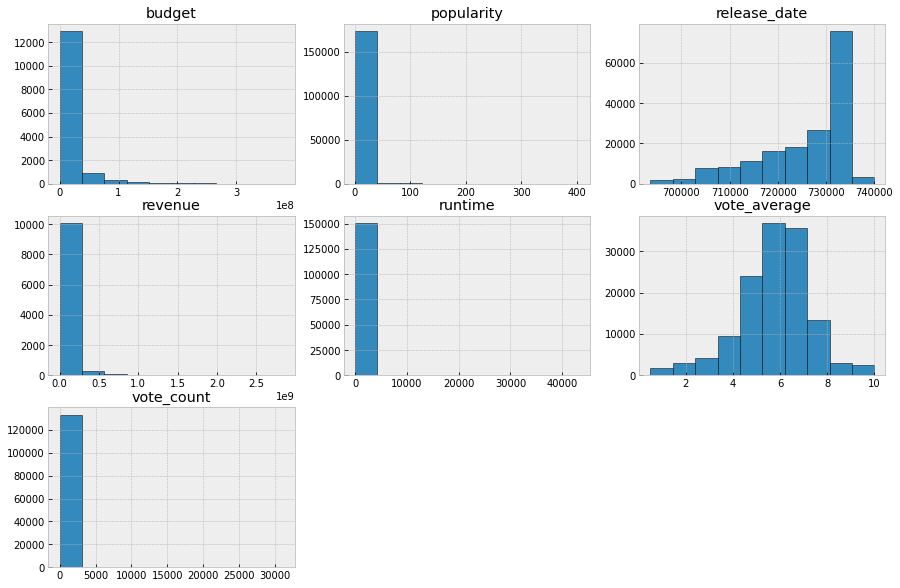

In [28]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.figure(figsize=(15,10))
for i in range(7):
    plt.subplot(3,3,i+1)
    plt.hist(df.iloc[:,i],edgecolor="black")
    plt.title(df.columns[i])
plt.show()

### Normalizing data

In [29]:
from sklearn.preprocessing import StandardScaler

# Select budget,popularity,revenue,runtime and vote count columns
df_standard = df.iloc[:,:7]

# Replacing outlier using 90 percentil as thresold
for i in range(df_standard.shape[1]):
    thresold = np.nanpercentile(df_standard.iloc[:, i],90)
    df_standard.iloc[:, i].mask(df_standard.iloc[:, i] > thresold,thresold,inplace=True)

scaler = StandardScaler()

#
df_standard = pd.DataFrame(scaler.fit_transform(df_standard),
                           columns=df_standard.columns)
df_standard["id"] = df.index
df_standard.set_index("id", inplace=True)

df_standard = pd.concat([df_standard, df.iloc[:,7:]], axis=1)
df_standard

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,avant-garde,school,robbery,dutch cabaret,"london, england",1970s,sibling relationship,surrealism,anthology,france
id,,,,,,,,,,,,,,,,,,,,,
2,NaN,2.293564,0.021899,NaN,-0.244393,0.794846,2.521822,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,2.293564,-0.055239,NaN,-0.213398,1.081410,2.521822,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.436829,2.293564,0.295295,-0.600407,0.530483,0.006795,2.521822,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.847295,2.293564,0.212909,-0.422166,0.902424,0.579923,2.521822,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.735803,0.168989,0.681093,NaN,-0.027428,1.296334,0.066497,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285854,NaN,-0.783238,0.837049,NaN,0.282523,-0.996179,-0.622717,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285855,NaN,-0.632686,-2.182164,NaN,0.158543,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285856,NaN,0.142900,0.931819,NaN,0.716454,-0.566333,-0.450414,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalize feature histogram

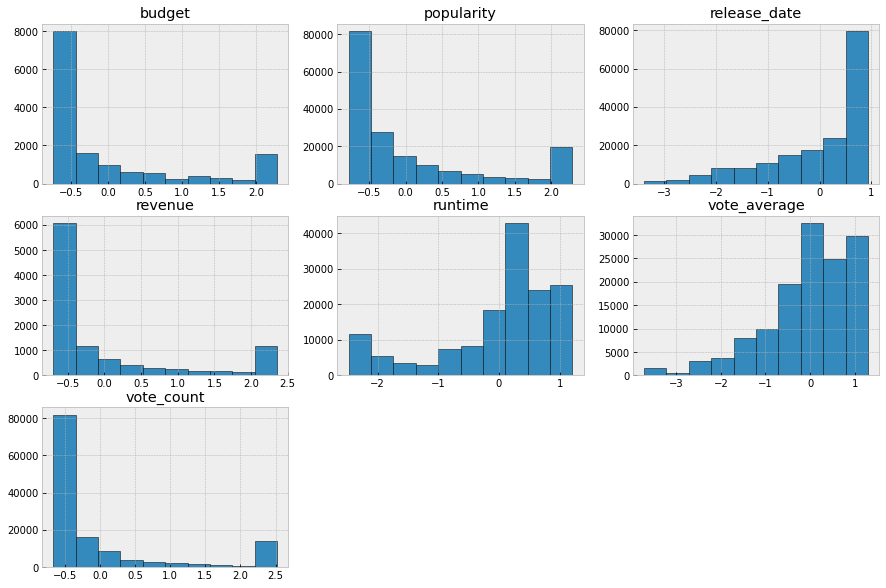

In [30]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.figure(figsize=(15, 10))
for i in range(7):
    plt.subplot(3, 3, i+1)
    plt.hist(df_standard.iloc[:, i], edgecolor="black")
    plt.title(df_standard.columns[i])
plt.show()

### Normal data BoxPlot

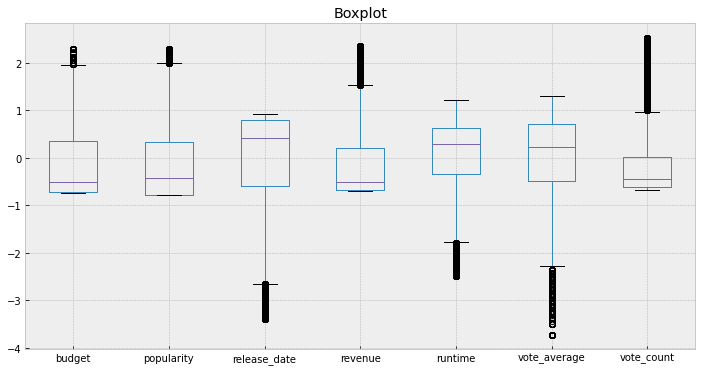

In [31]:
plt.figure(figsize=(12,6))
plt.style.use("bmh")
plt.title("Boxplot")
df_standard.iloc[:,:7].boxplot()
plt.show()

## Improving data input

### Weight features assign

In [314]:
# Assign weight to collection column
#weight = 5
#df_standard["collection"] *= weight
#weight = 10
#df_standard["release_date"] *= weight
#df_standard.iloc[:,7:] *= 0.5

### Drop features

In [283]:
#df_standard.drop("budget",axis=1,inplace=True)
#df_standard.drop("popularity",axis=1,inplace=True)
#df_standard.drop("revenue",axis=1,inplace=True)
#df_standard.drop("runtime",axis=1,inplace=True)
#df_standard.drop("vote_average",axis=1,inplace=True)
#df_standard.drop("vote_count",axis=1,inplace=True)

## Testing model

### Looking for id Movie

In [35]:
from jellyfish import levenshtein_distance

# Looking for similarity names movies
movie_name = "Batman Gotham Knight"

# Calculates distance beetwen movie name and list fo titles
idx = titles["original_title"].apply(
    lambda x: levenshtein_distance(movie_name,x))
idx = idx.sort_values()[:10]    # Sort vector distances and extract first 10
titles.loc[idx.index]           # Show title names

,original_title,release_date
id,,
13851,Batman: Gotham Knight,7/8/2008
237147,Wotta Knight,10/23/1947
277606,Out in the Night,6/12/2014
6038,Shanghai Knights,2/6/2003
35401,Fear in the Night,4/10/1947
208802,Kamasutra Nights,2/13/2008
22117,Women in the Night,1/2/1948
364,Batman Returns,6/19/1992
42944,Say Goodnight,7/22/2008


### Extract cover function

In [36]:
def extract_img(movie_id):
    # Api data and movie index example
    api_key = "44f9a7f09387a49408460a6d158e1f44"
    # URL to retrieve movie info
    url = "https://api.themoviedb.org/3/movie/" + \
        str(movie_id) + "?api_key=" + api_key
    # Making a request example
    request_obj = requests.get(url).text
    # Load dictionary with file info from request
    row = json.loads(request_obj)
    # Poster URL
    poster_url = "https://image.tmdb.org/t/p/w500"+str(row.get("poster_path"))
    return requests.get(poster_url)

### Using euclidean distance to find similar movies

Selected movie: Batman: Gotham Knight (7/8/2008)


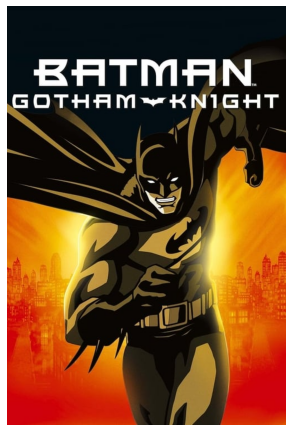

,Title,Release Date
id,,
12180,Star Wars: The Clone Wars,8/5/2008
166076,Superman: Unbound,4/23/2013
56590,All Star Superman,2/22/2011
63686,Thor: Tales of Asgard,5/16/2011
13647,The Invincible Iron Man,1/23/2007
16873,Battle for Terra,9/6/2007
183011,Justice League: The Flashpoint Paradox,7/30/2013
17189,銃夢 -GUNNM-,6/21/1993
1857,The Transformers: The Movie,8/8/1986


In [37]:
from sklearn.metrics.pairwise import nan_euclidean_distances
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO
import json
import requests

movie_id = 13851 # Movie id to test
print("Selected movie: {} ({})".format(
      titles.loc[movie_id].values[0],
      titles.loc[movie_id].values[1]))
n = 10      # Number of similar movies

# Plot movie image
plt.figure(figsize=(5, 10))
poster_img = extract_img(movie_id)
if poster_img.status_code == 200:
    imshow = Image.open(BytesIO(poster_img.content))
    plt.axis('off')
    plt.imshow(imshow)
    plt.show()

# Calculate distances (euclidean distance)
distances = nan_euclidean_distances(
    df_standard.loc[movie_id].values.reshape(1, -1),
    df_standard)
distances = pd.DataFrame(distances,columns=df.index)

# Order values by ascending order
recomendations = distances.iloc[0].sort_values()[1:n+1]

# Get names of movies
top = titles.loc[recomendations.index]
top.columns = ["Title","Release Date"] # Rename columns
top


### Extract covers top 10
Function to extract request image object.

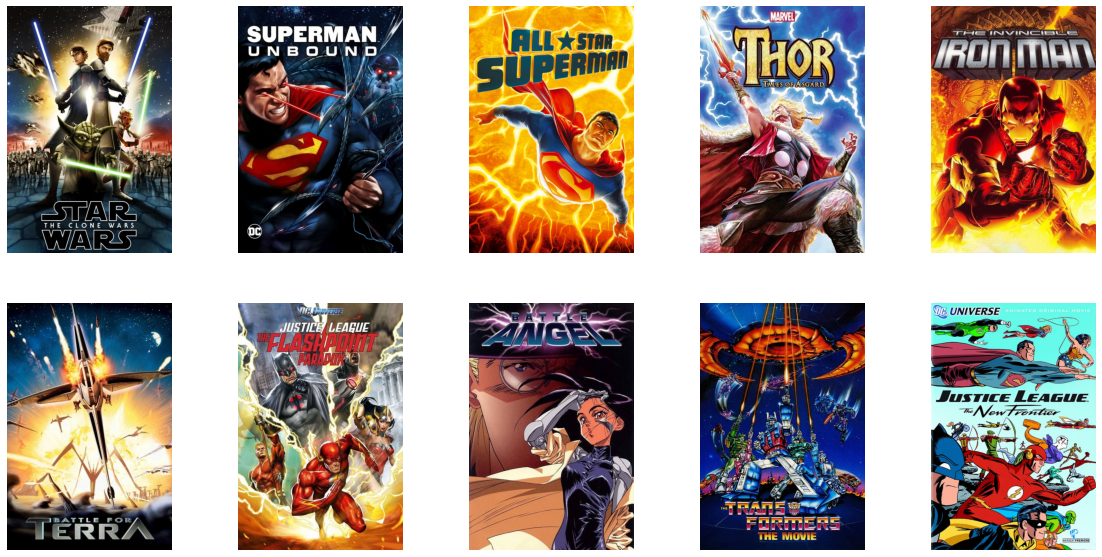

In [38]:
counter = 0
plt.figure(figsize=(20,10))
for movie_idx in top.index:
    poster_img = extract_img(movie_idx)
    if poster_img.status_code == 200:
        imshow = Image.open(BytesIO(poster_img.content))
        plt.subplot(int(np.ceil(n/5)), 5, counter+1)
        plt.axis('off')
        plt.imshow(imshow)
        counter += 1
plt.show()